# 第２章　様々なクラスタリングを行う10本ノック

## ノック11:SpectralClusteringでクラスタリングを実施してみよう




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing
from sklearn import datasets

X,z = datasets.make_moons(n_samples=200, noise=0.05, random_state=0)
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
display(X_norm)

array([[ 0.36748451,  0.54576641],
       [ 1.28731953, -1.2803031 ],
       [-0.59397643,  0.04357482],
       [-1.74182239, -0.66371706],
       [ 1.45705144, -0.85667812],
       [ 1.58953574, -0.59675854],
       [ 0.54875768, -0.08552893],
       [ 0.44914675, -1.50218876],
       [ 0.46138047,  0.23124986],
       [ 0.71117525, -1.59382202],
       [-0.98693652,  1.16613579],
       [-0.28618307, -0.9941549 ],
       [ 1.51445888, -0.7760272 ],
       [ 0.82589866, -1.33505302],
       [-1.51451022,  0.79027655],
       [ 0.55545785, -0.08853775],
       [ 0.05104108,  1.284163  ],
       [-0.17030547, -1.12065006],
       [-0.1659644 ,  1.28843594],
       [-1.46106881,  1.15527198],
       [ 1.63987535, -0.48630812],
       [ 0.41814803, -1.47618916],
       [-0.34023715,  1.50810931],
       [ 0.90980627, -1.26183242],
       [-0.88905065,  1.56616629],
       [-0.29208555, -0.66541512],
       [ 1.55266276, -0.70888274],
       [ 1.59187607, -0.4198694 ],
       [-0.37934026,

<function matplotlib.pyplot.show(close=None, block=None)>

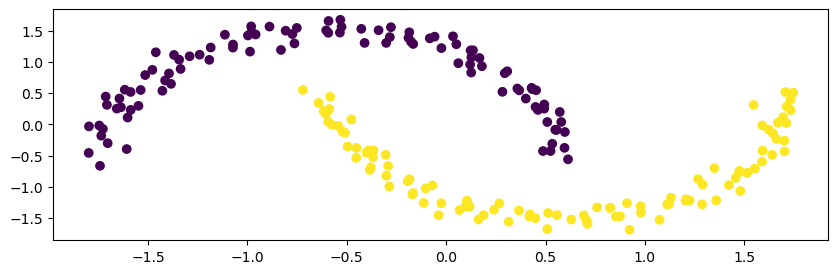

In [2]:
x = X_norm[:, 0]
y = X_norm[:, 1]
plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

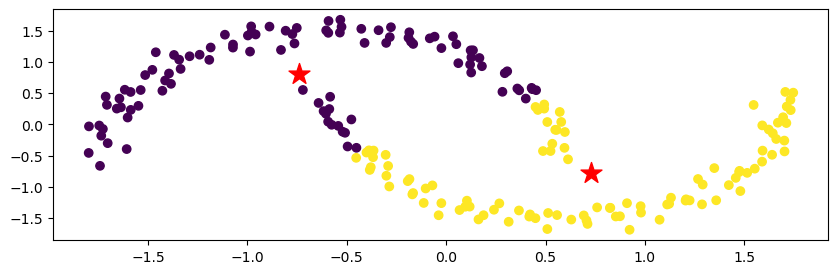

In [3]:
km = cluster.KMeans(n_clusters=2)
z_km = km.fit(X_norm)

plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker="*", c="red")
plt.show

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<function matplotlib.pyplot.show(close=None, block=None)>

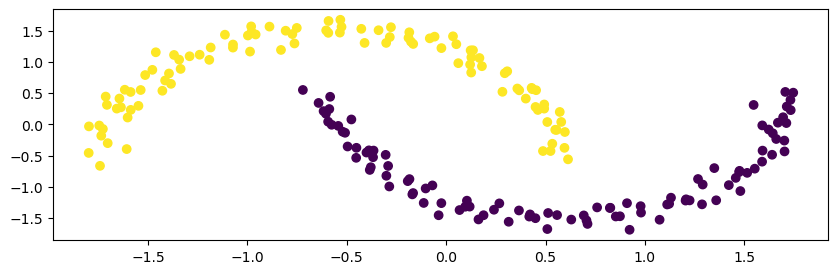

In [4]:
spc = cluster.SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
z_spc = spc.fit(X_norm)

plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z_spc.labels_)
plt.show

## ノック12:MeanShiftを使ったクラスタリングを実施してみよう

In [5]:
df_wine_all = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
df_wine = df_wine_all[[0,10,13]]
df_wine.columns = [u"class", u"color", u"proline"]
pd.DataFrame(df_wine)

,class,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735
...,...,...,...
173,3,7.70,740
174,3,7.30,750
175,3,10.20,835
176,3,9.30,840


<function matplotlib.pyplot.show(close=None, block=None)>

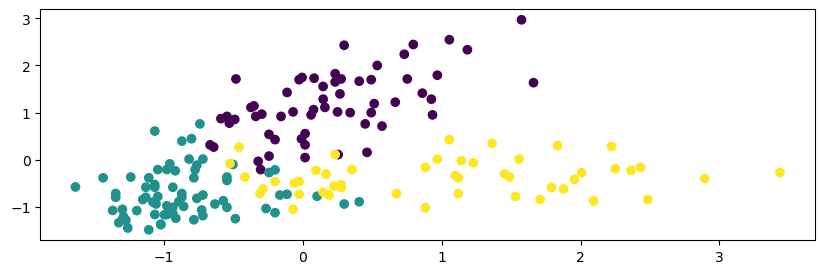

In [6]:
X = df_wine[["color", "proline"]]
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
z = df_wine["class"]
plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

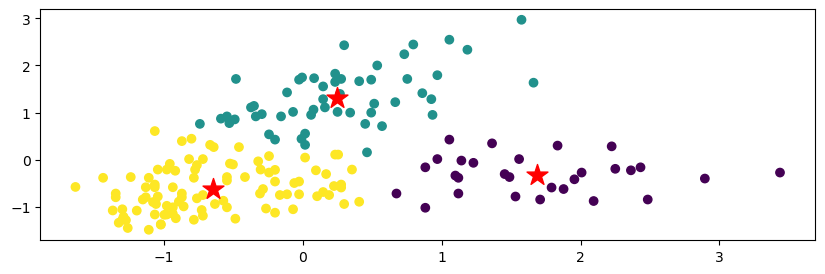

In [7]:
km = cluster.KMeans(n_clusters=3)
z_km = km.fit(X_norm)
plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker="*", c="red")
plt.show

[[-0.6207637  -0.59667224]
 [ 1.49736922 -0.30032022]]


<function matplotlib.pyplot.show(close=None, block=None)>

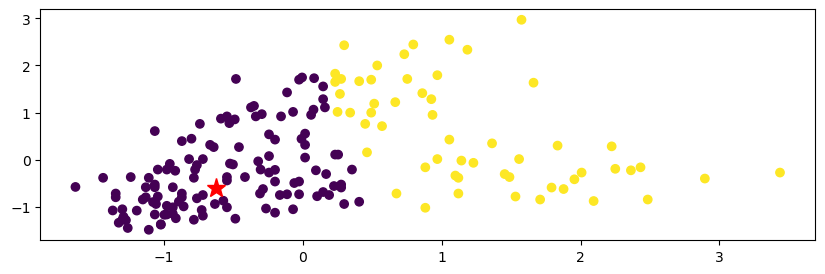

In [8]:
ms = cluster.MeanShift(seeds=X_norm)
ms.fit(X_norm)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)

plt.figure(figsize=(10,3))
plt.scatter(x,y, c=labels)
plt.plot(cluster_centers[0,0], cluster_centers[0,1], marker="*", c="red", markersize=14)
plt.show

## ノック13:X-meansで非階層型クラスタリングを実施してみよう

In [9]:
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
xm_c = kmeans_plusplus_initializer(X_norm, 2).initialize()
xm_i = xmeans(data=X_norm, initial_centers=xm_c, kmax=20, ccore=True)
xm_i.process()

<function matplotlib.pyplot.show(close=None, block=None)>

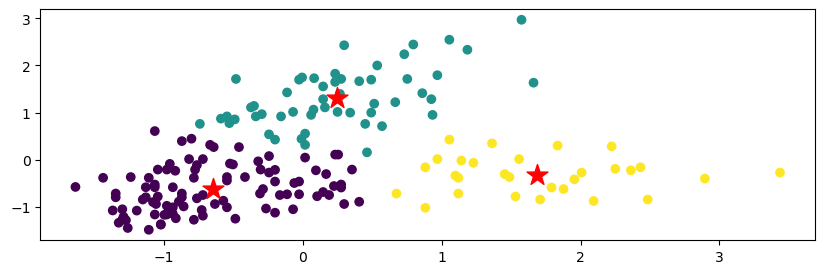

In [10]:
z_xm = np.ones(X_norm.shape[0])
for k in range(len(xm_i._xmeans__clusters)):
    z_xm[xm_i._xmeans__clusters[k]] = k+1
plt.figure(figsize=(10,3))
plt.scatter(x,y, c=z_xm)
centers = np.array(xm_i._xmeans__centers)
plt.scatter(centers[:,0],centers[:,1],s=250, marker="*",c="red")
plt.show

## ノック14:GMMでクラスタリングを実施してみよう

## ノック15:VBGMMでクラスタリングを実施してみよう

## ノック16:VBGMMで最適なクラスタ数の探索してみよう

## ノック17:MiniBatchKMeansでクラスタリングを実施してみよう

## ノック18:DBSCANでクラスタリングを実施してみよう

## ノック19:DBSCANでノイズを確認してみよう

## ノック20:HDBSCANでクラスタリングを実施してみよう